# Random Forest Regression
https://towardsdatascience.com/machine-learning-basics-random-forest-regression-be3e1e3bb91a

In [4]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [5]:
simu = 'x5'
with open('data_for_analisys/{}/vec_dict1.pickle'.format(simu), 'rb') as h:
#with open('vec_dict1.pickle', 'rb') as h:
    vec = pickle.load(h)
with open('data_for_analisys/{}/sca_dict1.pickle'.format(simu), 'rb') as h:
#with open('sca_dict1.pickle', 'rb') as h:
    sca = pickle.load(h)

In [6]:
vec[1]

,run,type,module,name,attrname,attrvalue,value,vectime,vecvalue
53,General-0-20210228-06:26:15-2761,vector,dtnsim.node[1].dtn,sdrBundleStored:vector,NaN,NaN,NaN,0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0 1 2 3 4 5 6 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 ...
57,General-0-20210228-06:26:15-2761,vector,dtnsim.node[1].dtn,sdrBytesStored:vector,NaN,NaN,NaN,0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0 128 256 384 512 640 768 896 1024 1024 1024 1...
109,General-0-20210228-06:26:15-2761,vector,dtnsim.node[1].dtn,routeCgrDijkstraCalls:vector,NaN,NaN,NaN,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
113,General-0-20210228-06:26:15-2761,vector,dtnsim.node[1].dtn,routeCgrDijkstraLoops:vector,NaN,NaN,NaN,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
117,General-0-20210228-06:26:15-2761,vector,dtnsim.node[1].dtn,routeCgrRouteTableEntriesCreated:vector,NaN,NaN,NaN,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
121,General-0-20210228-06:26:15-2761,vector,dtnsim.node[1].dtn,routeCgrRouteTableEntriesExplored:vector,NaN,NaN,NaN,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
125,General-0-20210228-06:26:15-2761,vector,dtnsim.node[1].dtn,dtnCgrCalls:vector,NaN,NaN,NaN,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...
129,General-0-20210228-06:26:15-2761,vector,dtnsim.node[1].dtn,sdrBundlesDeleted:vector,NaN,NaN,NaN,1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...,0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 ...


In [7]:
i = 3
vec[i].loc[vec[i].name == 'sdrBundlesDeleted:vector']['vecvalue'].to_list()

['0 0 0 0 0 0 0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 91 91 91 91 91 91 91 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 227 227 227 227 227 227 227 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 25

# Bottleneck 1

In [8]:
check_nodes = 4
tar = 5
dfinfo = []
for i in range(check_nodes):
    bunStored = vec[i+1].loc[vec[i+1]['name'] == 'dtnCgrCalls:vector'] #i+1
    if bunStored['vecvalue'].to_list() != []:
        aux = tuple(map(float, bunStored['vecvalue'].to_list()[0].split()))
        dfinfo.append(aux)
    cgrCalls = vec[i+1].loc[vec[i+1]['name'] == 'sdrBundlesDeleted:vector']
    if cgrCalls['vecvalue'].to_list() != []:
        aux = tuple(map(float, cgrCalls['vecvalue'].to_list()[0].split()))
        dfinfo.append(aux)
    
    explo = vec[i+1].loc[vec[i+1]['name'] == 'routeCgrDijkstraCalls:vector']
    aux = tuple(map(float, explo['vecvalue'].to_list()[0].split()))
    dfinfo.append(aux)
    explo = vec[i+1].loc[vec[i+1]['name'] == 'routeCgrDijkstraLoops:vector']
    aux = tuple(map(float, explo['vecvalue'].to_list()[0].split()))
    dfinfo.append(aux)
    explo = vec[i+1].loc[vec[i+1]['name'] == 'routeCgrRouteTableEntriesCreated:vector']
    aux = tuple(map(float, explo['vecvalue'].to_list()[0].split()))
    dfinfo.append(aux)
    explo = vec[i+1].loc[vec[i+1]['name'] == 'routeCgrRouteTableEntriesExplored:vector']
    aux = tuple(map(float, explo['vecvalue'].to_list()[0].split()))
    dfinfo.append(aux)
    explo = vec[i+1].loc[vec[i+1]['name'] == 'sdrBundleStored:vector']
    aux = tuple(map(float, explo['vecvalue'].to_list()[0].split()))
    dfinfo.append(aux)
    

dfinfo = []
tar = 5
node = 1
bunStored = vec[node].loc[vec[node]['name'] == 'dtnCgrCalls:vector']
aux = tuple(map(float, bunStored['vecvalue'].to_list()[0].split()))
dfinfo.append(aux)
cgrCalls = vec[node].loc[vec[node]['name'] == 'sdrBundleStored:vector']
aux = tuple(map(float, cgrCalls['vecvalue'].to_list()[0].split()))
dfinfo.append(aux)

In [9]:
# Agregamos el nodo target
byStored = vec[tar].loc[vec[tar]['name'] == 'sdrBundleStored:vector']
aux = tuple(map(float, byStored['vecvalue'].to_list()[0].split()))
dfinfo.insert(0, aux)

In [10]:
src = list(zip(*dfinfo))
dataset = pd.DataFrame(src)#, columns = ['node5', 'node1','node2', 'node3', 'node4'])
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, :1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(470, 28)
(118, 28)
(470, 1)
(118, 1)


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

regressor = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
regressor.fit(X_train, y_train.values.ravel())


errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

if best_n_estimators == 0:
    best_n_estimators = 1

best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0
)
best_regressor.fit(X_train, y_train.values.ravel())

y_pred = best_regressor.predict(X_test)
mean_absolute_error(y_test, y_pred)

In [12]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train.values.ravel())
y_pred = regressor.predict(X_test)

In [13]:
y_test = y_test.values.reshape(1,len(y_test))[0] #sacamos los valors del test

In [68]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,8.0,8.00
1,1.0,1.00
2,1.0,1.80
3,1.0,0.26
4,1.0,0.86
...,...,...
113,0.0,0.00
114,0.0,0.00
115,7.0,6.32
116,1.0,0.86


Text(0, 0.5, 'Bundle Stored')

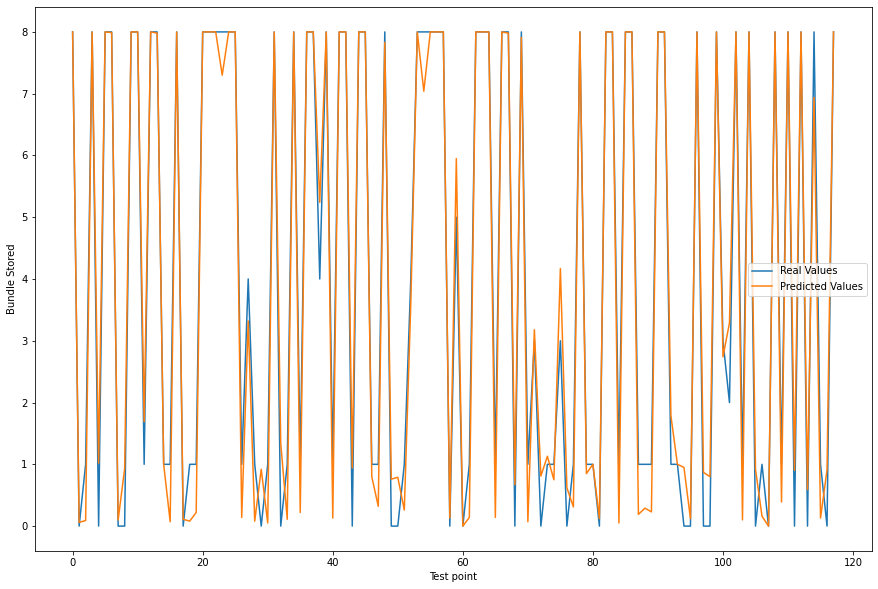

In [16]:
plot = df.plot(figsize=(15,10))
plot.set_xlabel("Test point")
plot.set_ylabel("Bundle Stored")

In [17]:
from sklearn.metrics import r2_score
cb1 = r2_score(y_test, y_pred)
cb1

0.9738177312356279

# Bottleneck 2

In [61]:
check_nodes = 2
tar = 6
dfinfo = []
for i in range(check_nodes):
    bunStored = vec[i+1].loc[vec[i+1]['name'] == 'sdrBundlesDeleted:vector'] #i+1
    aux = tuple(map(float, bunStored['vecvalue'].to_list()[0].split()))
    dfinfo.append(aux)
    cgrCalls = vec[i+1].loc[vec[i+1]['name'] == 'sdrBundleStored:vector']
    aux = tuple(map(float, cgrCalls['vecvalue'].to_list()[0].split()))
    dfinfo.append(aux)
    '''
    explo = vec[i+1].loc[vec[i+1]['name'] == 'routeCgrDijkstraCalls:vector']
    aux = tuple(map(float, explo['vecvalue'].to_list()[0].split()))
    dfinfo.append(aux)
    explo = vec[i+1].loc[vec[i+1]['name'] == 'routeCgrDijkstraLoops:vector']
    aux = tuple(map(float, explo['vecvalue'].to_list()[0].split()))
    dfinfo.append(aux)
    explo = vec[i+1].loc[vec[i+1]['name'] == 'routeCgrRouteTableEntriesCreated:vector']
    aux = tuple(map(float, explo['vecvalue'].to_list()[0].split()))
    dfinfo.append(aux)
    explo = vec[i+1].loc[vec[i+1]['name'] == 'routeCgrRouteTableEntriesExplored:vector']
    aux = tuple(map(float, explo['vecvalue'].to_list()[0].split()))
    dfinfo.append(aux)
    '''

dfinfo = []
tar = 6
node = 5
bunStored = vec[node].loc[vec[node]['name'] == 'dtnCgrCalls:vector'] #i+1
aux = tuple(map(float, bunStored['vecvalue'].to_list()[0].split()))
dfinfo.append(aux)
cgrCalls = vec[node].loc[vec[node]['name'] == 'sdrBundleStored:vector']
aux = tuple(map(float, cgrCalls['vecvalue'].to_list()[0].split()))
dfinfo.append(aux)
'''
explo = vec[i+1].loc[vec[i+1]['name'] == 'routeCgrDijkstraCalls:vector']
aux = tuple(map(float, explo['vecvalue'].to_list()[0].split()))
dfinfo.append(aux)
explo = vec[i+1].loc[vec[i+1]['name'] == 'routeCgrDijkstraLoops:vector']
aux = tuple(map(float, explo['vecvalue'].to_list()[0].split()))
dfinfo.append(aux)
explo = vec[i+1].loc[vec[i+1]['name'] == 'routeCgrRouteTableEntriesCreated:vector']
aux = tuple(map(float, explo['vecvalue'].to_list()[0].split()))
dfinfo.append(aux)
explo = vec[i+1].loc[vec[i+1]['name'] == 'routeCgrRouteTableEntriesExplored:vector']
aux = tuple(map(float, explo['vecvalue'].to_list()[0].split()))
dfinfo.append(aux)
'''

In [62]:
# Agregamos el nodo target
byStored = vec[tar].loc[vec[tar]['name'] == 'sdrBundleStored:vector']
aux = tuple(map(float, byStored['vecvalue'].to_list()[0].split()))
dfinfo.insert(0, aux)

In [65]:
src = list(zip(*dfinfo))
dataset = pd.DataFrame(src, columns = ['bunStored (node6)', 'CgrCalls (node5)', 'bunStored (node5)', 'CgrCalls (node4)', 'bunStored (node4)'])
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, :1]

In [66]:
dataset

,bunStored (node6),CgrCalls (node5),bunStored (node5),CgrCalls (node4),bunStored (node4)
0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0
2,0.0,0.0,2.0,0.0,2.0
3,1.0,0.0,3.0,0.0,3.0
4,0.0,0.0,4.0,0.0,4.0
...,...,...,...,...,...
583,8.0,478.0,8.0,536.0,1.0
584,8.0,479.0,8.0,537.0,2.0
585,8.0,480.0,8.0,538.0,3.0
586,8.0,481.0,8.0,539.0,4.0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(470, 10)
(118, 10)
(470, 1)
(118, 1)


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

regressor = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
regressor.fit(X_train, y_train.values.ravel())


errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

if best_n_estimators == 0:
    best_n_estimators = 1

best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0
)
best_regressor.fit(X_train, y_train.values.ravel())

y_pred = best_regressor.predict(X_test)
mean_absolute_error(y_test, y_pred)

In [22]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train.values.ravel())
y_pred = regressor.predict(X_test)

In [67]:
y_pred

array([8.  , 1.  , 1.8 , 0.26, 0.86, 0.  , 2.78, 0.03, 8.  , 0.  , 8.  ,
       1.  , 8.  , 0.  , 8.  , 0.94, 8.  , 8.  , 4.34, 0.97, 8.  , 8.  ,
       0.94, 1.  , 1.  , 0.  , 0.83, 0.59, 0.92, 7.66, 7.44, 0.77, 0.86,
       1.03, 0.23, 0.68, 0.9 , 0.89, 0.  , 8.  , 1.85, 8.  , 8.  , 4.23,
       0.  , 8.  , 0.09, 1.27, 0.  , 8.  , 8.  , 8.  , 8.  , 8.  , 0.72,
       7.22, 8.  , 8.  , 0.  , 8.  , 8.  , 0.89, 0.9 , 8.  , 8.  , 7.29,
       0.  , 0.  , 0.05, 1.  , 0.96, 1.  , 0.  , 0.4 , 1.15, 0.61, 0.  ,
       0.92, 8.  , 0.8 , 8.  , 0.  , 8.  , 8.  , 0.97, 0.26, 8.  , 0.9 ,
       8.  , 8.  , 8.  , 8.  , 0.16, 8.  , 8.  , 1.07, 8.  , 0.1 , 0.08,
       8.  , 0.2 , 0.34, 0.  , 0.9 , 0.  , 4.46, 0.3 , 8.  , 8.  , 1.59,
       0.66, 8.  , 8.  , 0.  , 0.  , 6.32, 0.86, 8.  ])

In [23]:
y_test = y_test.values.reshape(1,len(y_test))[0] #sacamos los valors del test

In [24]:
print('Standard deviation of test data = {}'.format(y_test.std()))
print('Standard deviation of pred data = {}'.format(y_pred.std()))

Standard deviation of test data = 3.605879921547335
Standard deviation of pred data = 3.577555773788129


Text(0, 0.5, 'Bundle Stored')

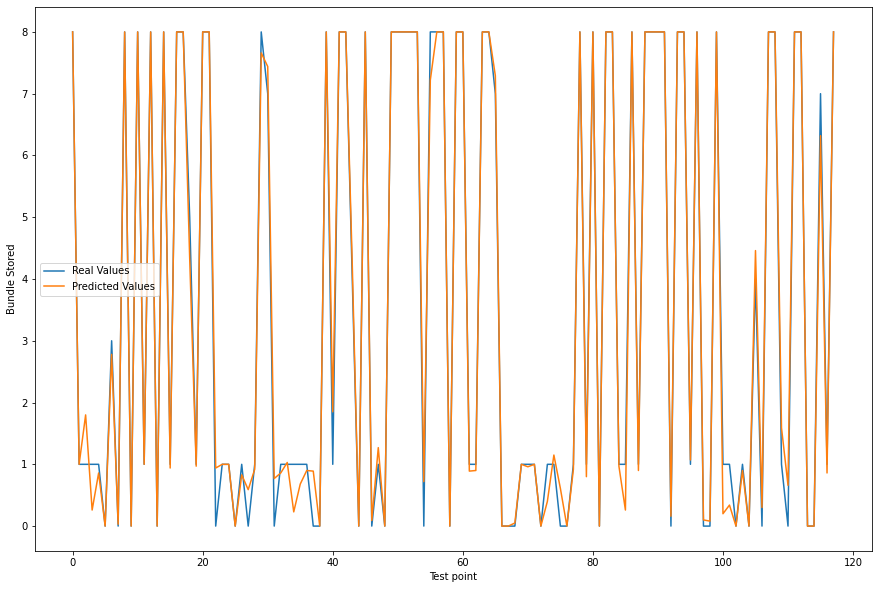

In [25]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
plot = df.plot(figsize=(15,10))
plot.set_xlabel("Test point")
plot.set_ylabel("Bundle Stored")

In [26]:
from sklearn.metrics import r2_score
cb2 = r2_score(y_test, y_pred)
cb2

0.9924809014333453

In [27]:
(cb2+cb1)/2

0.9831493163344867

In [29]:
totalBun = 0
totalLostBundles = 0
for i in range(1,7): #del nodo 1 al 6
    
    totalLostBundles += (int(sca[i].loc[sca[i]['name'] == 'sdrBundlesDeleted:max']['value']))
    totalBun += int(sca[i].loc[sca[i]['name'] == 'dtnBundleReceivedFromCom:count']['value'])
    
bunReceived = int(sca[7].loc[sca[7]['name'] == 'dtnBundleSentToAppHopCount:histogram']['count'])

#print('Total Bundles: {}'.format(totalBun))
print('Lost Bundles: {}'.format(totalLostBundles))
print('Bundles received by the final node: {}'.format(bunReceived))
#print('Bundles perdidos: {} '.format((totalBun-bunReceived)))

Lost Bundles: 7639
Bundles received by the final node: 361


In [30]:
x = [10, 30, 50, 70, 100, 300, 500, 700, 1000]
acc = [99, 94, 84.5, 93.5, 82.5, 26, 51, 10.5, 18.5]
lost_bundles = np.array([25, 87, 196, 288, 534, 2025, 3630, 5220, 7639])
bundles_received = np.array([55, 153, 204, 272, 266, 375, 370, 380, 361])

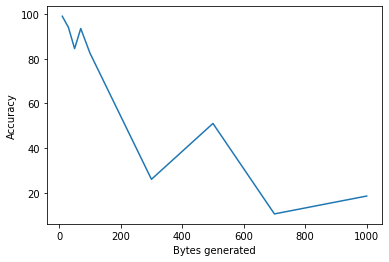

In [31]:
plt.plot(x, acc)
plt.rcParams["figure.figsize"] = (20,3)
plt.xlabel("Bytes generated")
plt.ylabel("Accuracy")
plt.show()

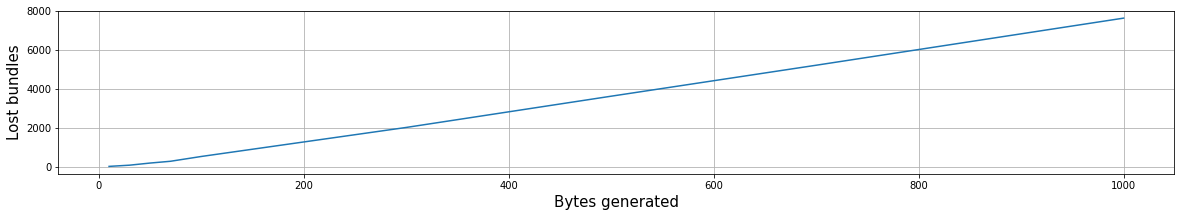

In [32]:
plt.plot(x, lost_bundles)
plt.grid()
plt.rcParams["figure.figsize"] = (20,3)
plt.xlabel("Bytes generated", fontsize=15)
plt.ylabel("Lost bundles", fontsize=15)
plt.show()

In [33]:
congestion_ratio =(bundles_received + lost_bundles)  / bundles_received 
congestion_ratio

array([ 1.45454545,  1.56862745,  1.96078431,  2.05882353,  3.0075188 ,
        6.4       , 10.81081081, 14.73684211, 22.16066482])

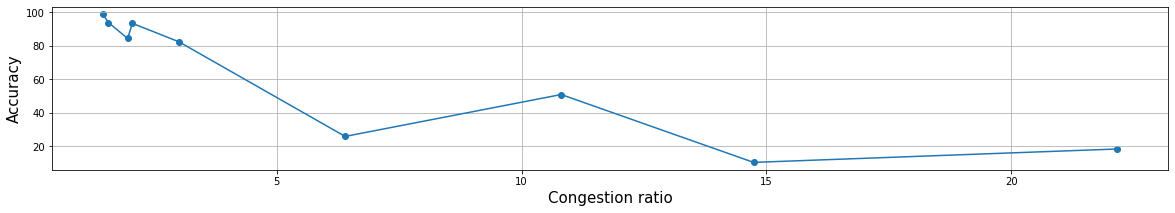

In [34]:
plt.plot(congestion_ratio, acc)
plt.grid()
plt.scatter(congestion_ratio, acc)
plt.rcParams["figure.figsize"] = (20,10)
plt.xlabel("Congestion ratio", fontsize=15) # Total bundles generated / Bundles delivered to destination 
plt.ylabel("Accuracy", fontsize=15)
plt.show()